**Import libraries**

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import warnings

**Define libraries configurations**

In [2]:
warnings.filterwarnings(action="ignore")

**Split dataset into training and test sets**

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

**Data standardisation**

In [6]:
x_train_std = (x_train/255).reshape(-1,28,28,1)
x_test_std = (x_test/255).reshape(-1,28,28,1)

**One-hot encoding training and test labels**

In [7]:
ohe = OneHotEncoder(sparse=False)
y_train_enc = ohe.fit_transform(y_train.reshape(-1,1))
y_test_enc = ohe.transform(y_test.reshape(-1,1))

**CNN Model**

In [8]:
model = Sequential()

# input layer
model.add(Input(shape=(28, 28, 1)))

# convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', name = '1.Conv2D'))
model.add(MaxPooling2D(pool_size=(2,2), name = '1.MaxPool'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name = '2.Conv2D'))
model.add(MaxPooling2D(pool_size=(2,2), name = '2.MaxPool'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', name = '3.Conv2D'))
model.add(MaxPooling2D(pool_size=(2,2), name = '3.MaxPool'))    

model.add(Flatten(name = 'Flatten'))

# densely connected layers
model.add(Dense(128, activation='relu', name = 'Dense_layer'))

# output layer
model.add(Dense(10, activation='softmax', name = 'Dense_layer_'))

# compile with adam optimizer & categorical_crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1.Conv2D (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 1.MaxPool (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 2.Conv2D (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 2.MaxPool (MaxPooling2D)    (None, 7, 7, 64)          0         
                                                                 
 3.Conv2D (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 3.MaxPool (MaxPooling2D)    (None, 3, 3, 64)          0         
                                                                 
 Flatten (Flatten)           (None, 576)               0

In [9]:
history = model.fit(x_train_std, y_train_enc, batch_size=128, epochs=7, validation_split=0.2, verbose=1)

Epoch 1/7
375/375 [==============================] - 17s 8ms/step - loss: 0.2549 - accuracy: 0.9249 - val_loss: 0.0892 - val_accuracy: 0.9704
Epoch 2/7
375/375 [==============================] - 2s 6ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 3/7
375/375 [==============================] - 2s 6ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0498 - val_accuracy: 0.9843
Epoch 4/7
375/375 [==============================] - 2s 6ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 5/7
375/375 [==============================] - 2s 6ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0336 - val_accuracy: 0.9894
Epoch 6/7
375/375 [==============================] - 3s 8ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 7/7
375/375 [==============================] - 2s 6ms/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0334 - val_accuracy: 0.9902


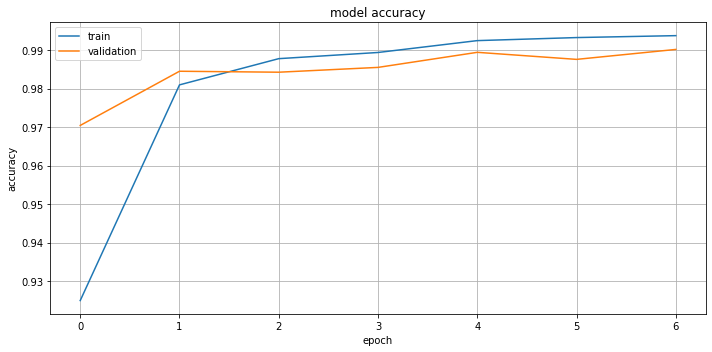

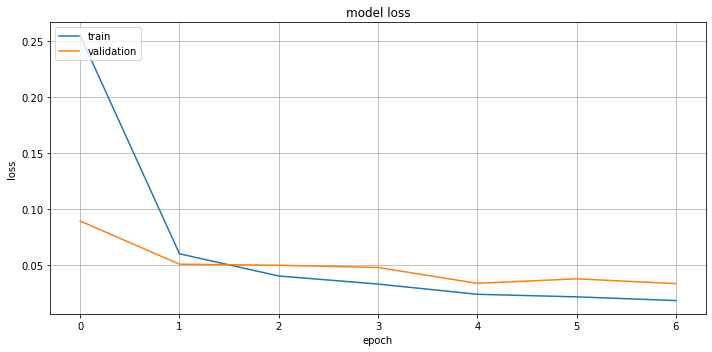

In [10]:
plt.figure(figsize=(10,5))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()

**Compute predictions on test set**

In [11]:
y_pred_proba = model.predict(x_test_std)


313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred = ohe.inverse_transform(y_pred_proba)

**Compute classification metrics on test set**

In [13]:
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion matrix

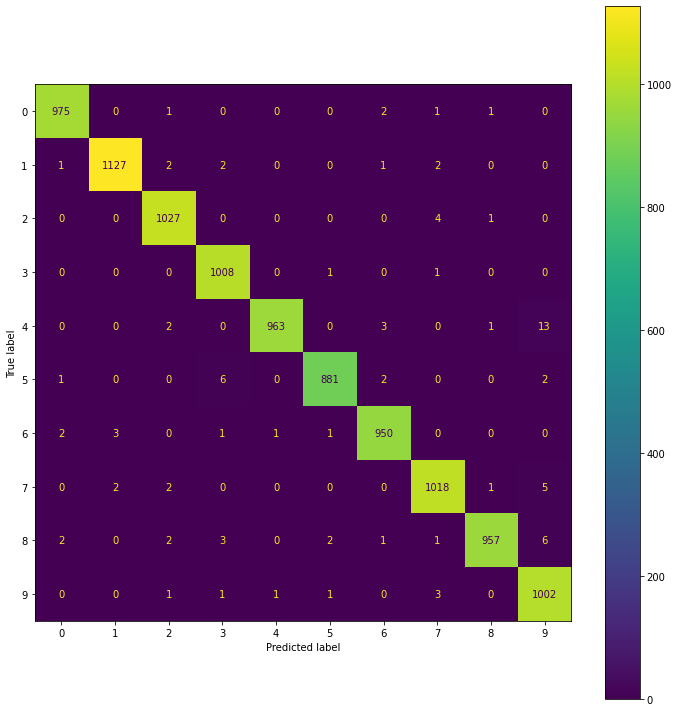

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, ax=ax)
plt.tight_layout()
plt.show()

**Serialize fitted model**

In [15]:
model.save('./model/CNN_Model.h5')